In [5]:
# Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
import easyocr
import numpy as np
from PIL import Image

Text(0.5, 1.0, 'Imagem Original')

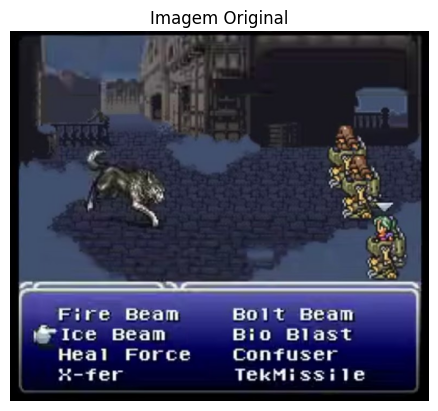

In [6]:
dicionario = {
    'Combate': '..\\FFVI\\Combat\\combate.jpg',
    'Combate2': '..\\FFVI\\Combat\\combate2.jpg',
    'Combate3': '..\\FFVI\\Combat\\combate3.jpg',
    'teste': '..\\FFVI\\Dialog\\textbox_with_img.png',
    'teste2': '..\\FFVI\\Maps\\caverna_interior3.jpg',
    'teste3': '..\\FFVI\\Dialog\\texto_baixo.png',
}

escolha = 'Combate' 
original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')

Proporção de pixels azuis na região inferior: 0.5555380940407342


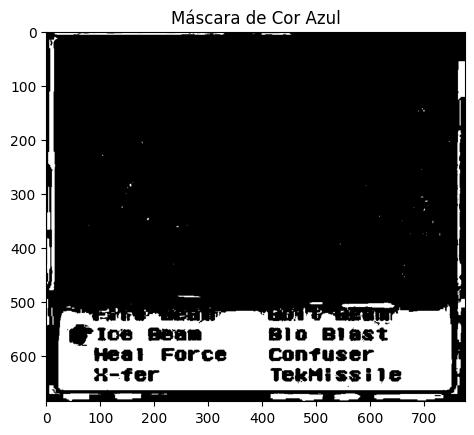

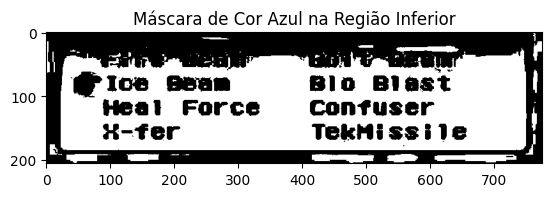

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Combate detectado na imagem.


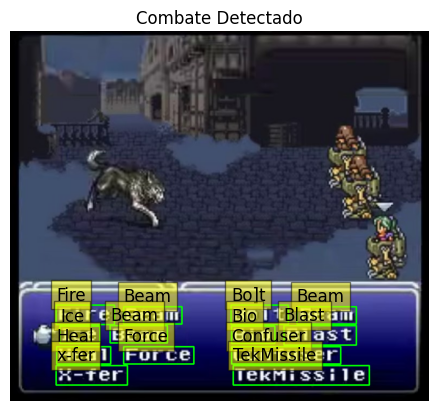

['Fire',
 'Beam',
 'Bo]t',
 'Beam',
 'Ice',
 'Beam',
 'Bio',
 'Blast',
 'Heal',
 'Force',
 'Confuser',
 'x-fer',
 'TekMissile']

In [7]:
# Função para verificar a presença de uma cor azul significativa na região inferior da imagem
def verificar_cor_azul(image, threshold=0.55, region_fraction=0.3):
    # Converter a imagem para o espaço de cores HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Definir o intervalo para a cor azul
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    # Criar uma máscara para a cor azul
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Considerar apenas a região inferior da imagem
    height = mask.shape[0]
    region_height = int(height * region_fraction)
    mask_region = mask[height - region_height:, :]
    
    # Calcular a proporção de pixels azuis na região inferior
    blue_ratio = np.sum(mask_region > 0) / mask_region.size
    print(f"Proporção de pixels azuis na região inferior: {blue_ratio}")
    
    # Visualizar a máscara de cor azul
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara de Cor Azul')
    plt.show()
    
    plt.imshow(mask_region, cmap='gray')
    plt.title('Máscara de Cor Azul na Região Inferior')
    plt.show()
    
    return blue_ratio > threshold

# Função para identificar combate na imagem
def identificar_combate(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Verificar se a imagem tem uma área significativa de cor azul na região inferior
    azul_presente = verificar_cor_azul(image)
    
    # Aplicar OCR na imagem para detectar texto
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_rgb)
    
    # Verificar se há qualquer texto detectado
    combate_detectado = len(result) > 0
    
    detected_texts = []
    if combate_detectado:
        for (bbox, text, prob) in result:
            detected_texts.append(text)
            # Desenhar um retângulo ao redor do texto detectado
            top_left = tuple(map(int, bbox[0]))
            bottom_right = tuple(map(int, bbox[2]))
            cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
            plt.text(top_left[0], top_left[1] - 10, text, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')
    
    # Combinar os resultados para determinar se é uma cena de combate
    if combate_detectado and azul_presente:
        print("Combate detectado na imagem.")
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Combate Detectado')
        plt.show()
        return detected_texts
    else:
        print("Nenhum combate detectado na imagem.")
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Sem Combate Detectado')
        plt.show()
        return []

# Caminho da imagem para teste
image_path = dicionario[escolha]  # Substituir pelo caminho da sua imagem

# Chamar a função para identificar combate na imagem
identificar_combate(image_path)
